In [32]:
from sklearn import cross_validation
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

今回のデータ探索では主に報酬と各データの関係性の有無を調査しました

In [34]:
sala= pd.read_csv('/Users/suzukishinji/Downloads/baseballdatabank-2017.1/core/Salaries.csv')
batt= pd.read_csv('/Users/suzukishinji/Downloads/baseballdatabank-2017.1/core/Batting.csv')
pitc= pd.read_csv('/Users/suzukishinji/Downloads/baseballdatabank-2017.1/core/Pitching.csv')
master= pd.read_csv('/Users/suzukishinji/Downloads/baseballdatabank-2017.1/core/Master.csv')

In [40]:
table3 = sala.groupby(['yearID','playerID','teamID']).count()
df = pd.DataFrame(table3) # DataFrameに変換
df[df['lgID']>1] 

,,,lgID,salary
yearID,playerID,teamID,,


データは一人につき１行なのかを確認

同じ年でチームIDが変わっていない人が存在するか->しなかった（'yearID','playerID','teamID'で絞った場合ユニークな人は一人）

In [41]:
table4 = sala.groupby(['yearID','playerID']).count()
df4 = pd.DataFrame(table4) # DataFrameに変換
df4[df4['lgID']>1]

teamID  lgID  salary
yearID playerID                       
1986   anderla02       2     2       2
       carltst01       2     2       2
       fostege01       2     2       2
       grosswa01       2     2       2
       johnto01        2     2       2
       mazzile01       2     2       2
       morenom01       2     2       2
       pastofr01       2     2       2
       slatoji01       2     2       2
       stefejo01       2     2       2
       thomago01       2     2       2
1987   barkele01       2     2       2
       berrada01       2     2       2
       bucknbi01       2     2       2
1988   kennete02       2     2       2
1989   quiseda01       2     2       2
1992   brantje01       2     2       2
       coxda01         2     2       2
       deleojo01       2     2       2
       fletcsc01       2     2       2
1993   boevejo01       2     2       2
       cadargr01       2     2       2
       caldeiv01       2     2       2
       gaettga01       2     2       2
       hatchbi01       2     2       2
       parrila02       2     2       2
       sandesc01       2     2       2
       seitzke01       2     2       2
       thompmi02       2     2       2
1994   gaettga01       2     2       2
...                  ...   ...     ...
1998   charlno01       2     2       2
       edmonbr01       2     2       2
       fieldce01       2     2       2
       fossato01       2     2       2
       gaettga01       2     2       2
       guilloz01       2     2       2
       incavpe01       2     2       2
       mormaal01       2     2       2
       olivejo01       2     2       2
       perezro01       2     2       2
       santaju01       2     2       2
       smallaa01       2     2       2
       tatisfe01       2     2       2
       telemam01       2     2       2
1999   brumfja01       2     2       2
       corsiji01       2     2       2
       fabrejo01       2     2       2
       figgami01       2     2       2
       maddumi01       2     2       2
       montgje01       2     2       2
       pooleji02       2     2       2
       reedje02        2     2       2
       rigbybr01       2     2       2
       slocuhe01       2     2       2
       wardtu01        2     2       2
       watsoal01       2     2       2
2000   wellsbo01       2     2       2
2010   taverwi01       2     2       2
2013   hernara02       2     2       2
2016   matzety01       2     2       2

[105 rows x 3 columns]

カウント数が1より大きいものを抽出

同じ年でチームIDが変わっている人がいるか->いる（'yearID','playerID'で絞った場合、teamIDが変わっている人はいる）

チームが変わった場合、別データとして列が増える

In [42]:
df4[df4['lgID']>1].count()

teamID    105
lgID      105
salary    105
dtype: int64

チームを移動した人間はなん人くらいか。１０５人なので一旦無視をしよう

In [35]:
batt_sala= pd.merge(batt, sala,on=('playerID', "yearID","teamID"), how='inner')
pitc_sala= pd.merge(pitc, sala,on=('playerID', "yearID","teamID"), how='inner')
master_sala= pd.merge(master, sala,on=('playerID'), how='left')

In [46]:
batt_sala.corr()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
yearID,1.000000,-0.042213,0.007172,-0.002252,-0.004725,-0.004524,0.026615,-0.035938,0.028569,-0.001265,-0.051623,-0.101112,-0.020558,0.073773,-0.050239,0.084389,-0.066188,-0.027455,0.009951,0.350145
stint,-0.042213,1.000000,-0.070757,-0.048143,-0.044201,-0.046379,-0.045399,-0.032156,-0.035117,-0.042263,-0.024599,-0.027664,-0.041196,-0.045549,-0.028047,-0.032888,-0.033077,-0.034550,-0.041755,-0.032823
G,0.007172,-0.070757,1.000000,0.926645,0.891624,0.915721,0.878515,0.615236,0.740231,0.864711,0.539121,0.617556,0.828557,0.835673,0.563265,0.612978,0.196791,0.750419,0.803894,0.176669
AB,-0.002252,-0.048143,0.926645,1.000000,0.963352,0.989932,0.948970,0.663965,0.797805,0.931075,0.591489,0.664298,0.876680,0.899089,0.590294,0.657551,0.238172,0.805757,0.868448,0.220493
R,-0.004725,-0.044201,0.891624,0.963352,1.000000,0.973454,0.939125,0.673577,0.848282,0.939240,0.632891,0.672615,0.911331,0.873136,0.617361,0.666069,0.182365,0.786378,0.813454,0.241328
H,-0.004524,-0.046379,0.915721,0.989932,0.973454,1.000000,0.958946,0.670533,0.804003,0.938860,0.600091,0.665103,0.875191,0.866040,0.610158,0.652933,0.205858,0.806013,0.864615,0.227543
2B,0.026615,-0.045399,0.878515,0.948970,0.939125,0.958946,1.000000,0.604121,0.799904,0.924762,0.522847,0.591308,0.851201,0.848422,0.599687,0.647512,0.152487,0.793213,0.837944,0.231135
3B,-0.035938,-0.032156,0.615236,0.663965,0.673577,0.670533,0.604121,1.000000,0.411375,0.547439,0.657190,0.655572,0.544098,0.562620,0.320844,0.398355,0.252135,0.481005,0.466507,0.046333
HR,0.028569,-0.035117,0.740231,0.797805,0.848282,0.804003,0.799904,0.411375,1.000000,0.927585,0.339393,0.398249,0.812875,0.827677,0.654654,0.593212,-0.045888,0.703086,0.712642,0.289430
RBI,-0.001265,-0.042263,0.864711,0.931075,0.939240,0.938860,0.924762,0.547439,0.927585,1.000000,0.454513,0.527208,0.878888,0.874124,0.666804,0.640342,0.075820,0.829642,0.841974,0.266918


バッティングのデータと報酬のデータに関連性があるという前提で各項目の相関をみた。

しかし、バティングデータ内での相関の高いものはあったが、報酬と高い相関のある項目は見当たらなかった。

高いのはyearID:0.35、HR:0.28

In [47]:
pitc_sala.corr()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
yearID,1.000000,-0.047528,-0.074562,-0.087761,0.067518,-0.058416,-0.254375,-0.160698,-0.002490,-0.097254,...,-0.043804,0.082357,-0.242777,-0.100653,-0.016855,-0.102343,-0.127374,-0.111096,-0.074099,0.337722
stint,-0.047528,1.000000,-0.055446,-0.061727,-0.070536,-0.045826,-0.026966,-0.022526,-0.022672,-0.065255,...,-0.038779,-0.050135,-0.022983,-0.066440,-0.027909,-0.066098,-0.018409,-0.020827,-0.021949,-0.028866
W,-0.074562,-0.055446,1.000000,0.669829,0.140616,0.831903,0.603707,0.542610,-0.103131,0.909452,...,0.489375,0.556789,0.275543,0.898868,-0.208994,0.782753,0.615779,0.583110,0.764195,0.270871
L,-0.087761,-0.061727,0.669829,1.000000,0.093395,0.820509,0.473038,0.367859,-0.072775,0.836753,...,0.501657,0.567063,0.277417,0.852390,-0.189767,0.886836,0.635692,0.642850,0.726340,0.220384
G,0.067518,-0.070536,0.140616,0.093395,1.000000,-0.187825,-0.055769,-0.048040,0.456312,0.148105,...,0.167408,0.100103,0.024459,0.138342,0.677491,0.036399,0.090487,0.052915,0.065648,-0.013894
GS,-0.058416,-0.045826,0.831903,0.820509,-0.187825,1.000000,0.586718,0.504913,-0.267125,0.925406,...,0.497805,0.602545,0.293501,0.931614,-0.477334,0.917352,0.653249,0.657385,0.795871,0.285721
CG,-0.254375,-0.026966,0.603707,0.473038,-0.055769,0.586718,1.000000,0.761346,-0.131506,0.634576,...,0.317070,0.289360,0.279855,0.620407,-0.243494,0.524597,0.386679,0.352795,0.516399,0.088929
SHO,-0.160698,-0.022526,0.542610,0.367859,-0.048040,0.504913,0.761346,1.000000,-0.113536,0.539566,...,0.251105,0.265330,0.215284,0.522960,-0.210496,0.414357,0.327733,0.267314,0.413622,0.109439
SV,-0.002490,-0.022672,-0.103131,-0.072775,0.456312,-0.267125,-0.131506,-0.113536,1.000000,-0.108022,...,-0.036965,-0.111908,-0.057881,-0.120183,0.888283,-0.194105,-0.095576,-0.145872,-0.143889,0.084814
IPouts,-0.097254,-0.065255,0.909452,0.836753,0.148105,0.925406,0.634576,0.539566,-0.108022,1.000000,...,0.560851,0.629644,0.318320,0.997790,-0.230829,0.921952,0.701115,0.688216,0.848152,0.268635


ピッチングのデータと報酬のデータに関連性があるという前提で各項目の相関をみた。

しかし、ピッチングデータ内での相関の高いものはあったが、報酬ととりわけ高い項目は見当たらなかった。

先発ピッチャーは高い

高いのはyearID:0.33、GS	:0.28

In [48]:
master_sala.corr()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height,yearID,salary
birthYear,1.000000,-0.002875,0.016763,0.857608,0.015751,0.024233,0.507856,0.439957,0.900800,0.182806
birthMonth,-0.002875,1.000000,0.027790,0.003110,0.000417,0.005590,-0.016658,0.013459,-0.023482,0.010449
birthDay,0.016763,0.027790,1.000000,-0.006166,0.013622,-0.004352,0.009194,0.002734,0.007629,0.027143
deathYear,0.857608,0.003110,-0.006166,1.000000,0.000264,0.007215,0.310171,0.365742,0.222303,0.059337
deathMonth,0.015751,0.000417,0.013622,0.000264,1.000000,0.020358,0.017220,0.016729,-0.023526,-0.042834
deathDay,0.024233,0.005590,-0.004352,0.007215,0.020358,1.000000,0.023242,0.026331,0.215033,-0.029641
weight,0.507856,-0.016658,0.009194,0.310171,0.017220,0.023242,1.000000,0.633527,0.424069,0.194297
height,0.439957,0.013459,0.002734,0.365742,0.016729,0.026331,0.633527,1.000000,0.057538,0.074537
yearID,0.900800,-0.023482,0.007629,0.222303,-0.023526,0.215033,0.424069,0.057538,1.000000,0.351447
salary,0.182806,0.010449,0.027143,0.059337,-0.042834,-0.029641,0.194297,0.074537,0.351447,1.000000


選手の体格のデータと報酬のデータに関連性があるという前提で各項目の相関をみた。

しかし、報酬ととりわけ高い項目は見当たらなかった。

上記のデータ内で一番高いのは「yearID」だった

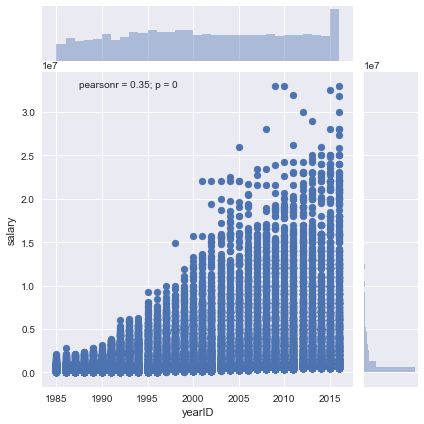

In [24]:
sns.jointplot(x = "yearID", y = "salary", data = sala);

yearIDと報酬の関連性が高いため、年代別にプロットしてみた。

結果、報酬が年々上がっていることがわかった。

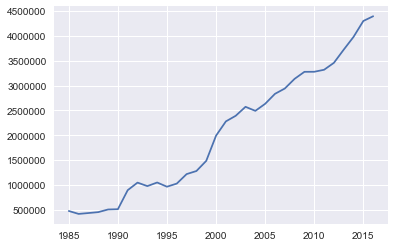

In [6]:
plt.plot(table1)

平均値で年代別の報酬をみていても上昇が確認できる

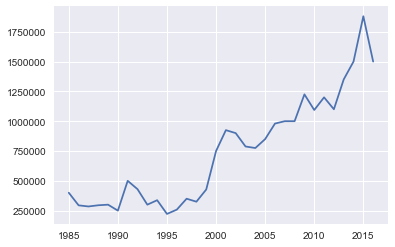

In [51]:
table2 = sala.groupby('yearID')['salary'].median()
plt.plot(table2)

中央値で年代別の報酬をみていても上昇が確認できる

In [49]:
sala2015 = sala[sala["yearID"] == 2015]
batt2015= batt[batt["yearID"] == 2015]
batt_sala2015= pd.merge(batt2015, sala2015,on=('playerID', "yearID"), how='left')
bs = batt_sala2015.dropna(axis=0, how='any', inplace=False)
bs.corr()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
yearID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stint,NaN,1.000000,-0.247355,-0.162757,-0.149732,-0.155270,-0.142715,-0.104024,-0.116016,-0.139008,-0.096691,-0.103907,-0.138032,-0.158885,-0.100821,-0.094246,-0.101997,-0.130975,-0.141539,0.055946
G,NaN,-0.247355,1.000000,0.923382,0.894724,0.912671,0.885796,0.618755,0.764416,0.873346,0.540691,0.612493,0.820480,0.864315,0.559068,0.642577,0.150873,0.750327,0.799808,0.148392
AB,NaN,-0.162757,0.923382,1.000000,0.968411,0.990691,0.958066,0.653816,0.820602,0.943866,0.592745,0.659018,0.872942,0.928311,0.590983,0.684810,0.184327,0.815699,0.866822,0.224513
R,NaN,-0.149732,0.894724,0.968411,1.000000,0.973765,0.950914,0.658797,0.868729,0.947708,0.624596,0.672762,0.909573,0.908716,0.614538,0.698733,0.137071,0.797617,0.822791,0.224553
H,NaN,-0.155270,0.912671,0.990691,0.973765,1.000000,0.963586,0.659844,0.815434,0.944108,0.611056,0.665562,0.869043,0.898073,0.611485,0.683280,0.153297,0.808130,0.863980,0.223621
2B,NaN,-0.142715,0.885796,0.958066,0.950914,0.963586,1.000000,0.616118,0.821619,0.936188,0.541027,0.613385,0.870481,0.882463,0.617369,0.679753,0.111958,0.812948,0.835887,0.216347
3B,NaN,-0.104024,0.618755,0.653816,0.658797,0.659844,0.616118,1.000000,0.423121,0.550393,0.621380,0.640121,0.511177,0.598555,0.257650,0.412351,0.209015,0.486082,0.465988,-0.010821
HR,NaN,-0.116016,0.764416,0.820602,0.868729,0.815434,0.821619,0.423121,1.000000,0.929686,0.348529,0.434889,0.850274,0.848625,0.652905,0.634865,-0.034587,0.738961,0.720123,0.261094
RBI,NaN,-0.139008,0.873346,0.943866,0.947708,0.944108,0.936188,0.550393,0.929686,1.000000,0.465246,0.525089,0.887258,0.898885,0.666682,0.678684,0.051757,0.844414,0.851811,0.264959


2015年に絞ってみた場合、相関がより明確に出るのではないか。

しかし結果はそこまで表れなかった。

In [50]:
sala2015 = sala[sala["yearID"] == 2015]
pitc2015= pitc[pitc["yearID"] == 2015]
pitc_sala2015= pd.merge(pitc2015, sala2015,on=('playerID', "yearID"), how='left')
ps = pitc_sala2015.dropna(axis=0, how='any', inplace=False)
ps.corr()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
yearID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stint,NaN,1.000000,-0.205197,-0.237775,-0.236749,-0.172145,-0.061303,-0.031296,-0.075651,-0.248847,...,-0.187417,-0.193727,-0.037168,-0.253039,-0.115282,-0.237752,-0.209141,-0.211311,-0.200466,0.088956
W,NaN,-0.205197,1.000000,0.689259,0.151422,0.850448,0.544043,0.446263,-0.065555,0.911355,...,0.582550,0.636236,0.226858,0.901335,-0.175664,0.796187,0.603823,0.571889,0.750127,0.324497
L,NaN,-0.237775,0.689259,1.000000,0.110824,0.832219,0.405372,0.312466,-0.063372,0.851450,...,0.550180,0.659092,0.231597,0.864605,-0.174598,0.898286,0.676077,0.598718,0.756151,0.265371
G,NaN,-0.236749,0.151422,0.110824,1.000000,-0.156170,-0.049044,-0.038309,0.412908,0.174502,...,0.233912,0.105373,0.021534,0.166894,0.636257,0.072499,0.137084,0.129284,0.112895,-0.122401
GS,NaN,-0.172145,0.850448,0.832219,-0.156170,1.000000,0.514066,0.405597,-0.216703,0.934866,...,0.557826,0.713932,0.265093,0.939956,-0.408099,0.922694,0.665861,0.633187,0.819984,0.356623
CG,NaN,-0.061303,0.544043,0.405372,-0.049044,0.514066,1.000000,0.814877,-0.097392,0.547482,...,0.305281,0.332519,0.218036,0.525585,-0.189766,0.439491,0.313616,0.314390,0.422532,0.351852
SHO,NaN,-0.031296,0.446263,0.312466,-0.038309,0.405597,0.814877,1.000000,-0.077648,0.440780,...,0.276386,0.249782,0.182341,0.420285,-0.147800,0.335331,0.243555,0.205937,0.286565,0.308936
SV,NaN,-0.075651,-0.065555,-0.063372,0.412908,-0.216703,-0.097392,-0.077648,1.000000,-0.065176,...,0.048182,-0.091510,-0.071083,-0.076215,0.905839,-0.148407,-0.110564,-0.118433,-0.111753,0.031083
IPouts,NaN,-0.248847,0.911355,0.851450,0.174502,0.934866,0.547482,0.440780,-0.065176,1.000000,...,0.636938,0.733126,0.282110,0.998141,-0.176067,0.930560,0.707705,0.673038,0.847942,0.332118


2015年に絞ってみた場合、相関がより明確に出るのではないか。

GS、CGの相関は全年代と比較して上がっていた

バッターよりピッチャーの方が成績と報酬に相関があるのかもしれない

しかし、データ数が多い場合、0.3を超えていれば相関はあると考えられる

http://www.biwako.shiga-u.ac.jp/sensei/mnaka/ut/rtable.html

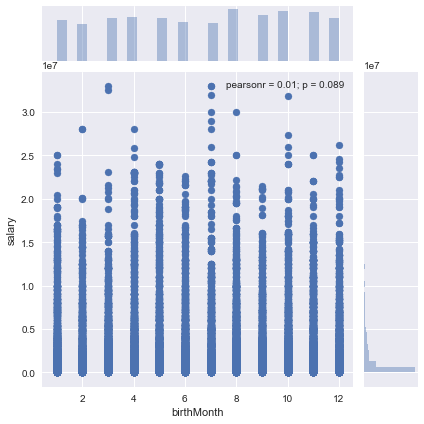

In [52]:
sns.jointplot(x = "birthMonth", y = "salary", data = master_sala);

早生まれはスポーツなどに不利という話がある。

プレイヤーに早生まれは少ないのでは思ったが、意外と各月の報酬にバラツキはなかった。

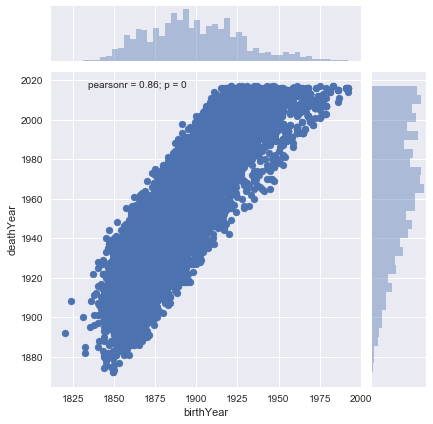

In [53]:
sns.jointplot(x = "birthYear", y = "deathYear", data = master_sala);

野球選手の寿命に何か特徴があるのか見てみた。

1925年以降に隙間が見える。おそらく近年、寿命が長くなって死亡年齢の幅が広がりバラツキが発生しているからではないか。